In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [4]:
chars = 'qwertyuiopasdfghjklzxcvbnm ?!.,:;01'
char_list = [i for i in chars]
n_char_list = len(char_list)

#문자열을 원핫 배열로
def string_to_onehot(string):
    #base
    onehot_base = np.zeros(n_char_list+2)

    #start
    start = np.copy(onehot_base)
    start[-2] = 1
    result = start 
    
    #string
    for i in string:
        onehot = np.copy(onehot_base)
        index = char_list.index(i)
        onehot[index] = 1
        result = np.vstack([result,onehot])

    #end
    end = np.copy(onehot_base)
    end[-1] = 1
    result = np.vstack([result,end])
    return torch.tensor(result)

#원핫을 알파벳으로
def onehot_to_alph(onehot):
    #change type
    try:
        onehot = torch.Tensor.numpy(onehot)
    except:
        pass

    try:
        return char_list[onehot.argmax()]
    except:
        pass


#test
test = string_to_onehot('abc')
print(test[2])
print(onehot_to_alph(test[2]))



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.], dtype=torch.float64)
b


In [5]:
#학습 정보
n_hidden = 35
lr = 0.05
epoch = 80

string = "hello pytorch. how long can a rnn cell remember?"

In [6]:
#간단한 버전 모델
class RNN(nn.Module):
    def __init__(self,input_size,output_size,hidden_size):
        super().__init__()

        #입력값 저장
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_size = hidden_size

        #레이어 선언
        self.i2h = nn.Linear(input_size,hidden_size)
        self.h2h = nn.Linear(hidden_size,hidden_size)
        self.i2o = nn.Linear(hidden_size,output_size)
        self.activ_func = nn.Tanh()

    def forward(self,input,hidden):
        hidden = self.i2h(input) + self.h2h(hidden)
        hidden = self.activ_func(hidden)
        output = self.i2o(hidden)
        return output, hidden

    def init_hidden(self): #시퀀스 처음에 히든레이어를 0으로 초기화하기 위함
        return torch.zeros(1,self.hidden_size).to(device)
        

In [14]:
input_size = n_char_list+2
rnn = RNN(input_size, input_size, n_hidden).to(device)
loss_func = nn.MSELoss()
optimizer = optim.Adam(rnn.parameters(),lr = lr)

In [15]:
data = torch.tensor(string_to_onehot(string),dtype=torch.float32).to(device)
loss_array = []

for i in tqdm(range(epoch)):
    rnn.zero_grad()
    total_loss = 0
    hidden = rnn.init_hidden()

    for j in range(data.shape[0] - 1):
        input_ = data[j,...]
        target = data[j+1,...]

        output,hidden = rnn.forward(input_,hidden)
        loss = loss_func(output,target)
        total_loss += loss
        
    total_loss.backward()
    optimizer.step()
    loss_array.append(total_loss.cpu().detach().numpy())

/tmp/ipykernel_349375/1797364207.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data = torch.tensor(string_to_onehot(string),dtype=torch.float32).to(device)
100%|██████████| 80/80 [00:01<00:00, 51.50it/s]


1.2046233


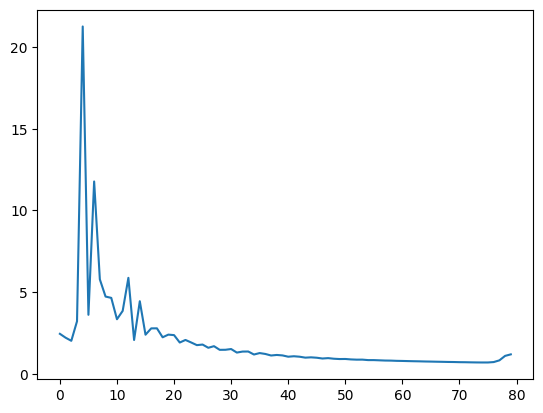

In [12]:
#print loss
print(loss_array[-1])
plt.plot(loss_array)
plt.show()

In [17]:
onehot_base = np.zeros(n_char_list+2)
start = torch.tensor(np.copy(onehot_base),dtype=torch.float32).to(device)
start[-2] = 1

with torch.no_grad():
    hidden = rnn.init_hidden()
    output_string = ""

    for i in range(30):
        output,hidden = rnn.forward(start,hidden)
        output_string += onehot_to_alph(output)
    
    print(output_string)
    

hheohhlhhohhohhohlohlohlohlohl
